## WeatherPy - Analysis Report

Note: Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 

<b>Trends Observed:</b>

Latitude vs. Max Temperature
The maximum temperature seems to be highest for cities located on or around the equator (the line of 0 latitude). The cities around the South Pole (Southern Hemisphere) seem to be warmer than the cities around the North Pole (Northern Hemisphere).

Latitude vs. Humidity
Majority of cities analyzed tend to have humidity between 60 and 100 percent. A big cluster of cities in Northern Hemisphere (between latitude 40 to 70) have a humidity % of 65 and above. 

Latitude vs. Cloudiness
There does not seem to be any particular relationship between the latitude and the cloudiness %. However, there are bands of cities at 0%, 78% and 100% of cloudiness (throughout Northern and Southern hemisphere).

Latitude vs. Wind Speed
The wind speed appears to be between 0 and 20 mph for most of the cities across the northern and southern hemisphere with few cities in the Southern Hemisphere having very high wind speed of above 25 mph.  



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from bokeh.plotting import figure, show, output_file, ColumnDataSource, output_notebook, save
from bokeh.models import HoverTool 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# function to call weather API and get the weather data for each city

def get_current_weather(api_key, city, unit):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        'appid': api_key,
        'q': city,
        'units': unit
    }
    
    weather_response = requests.get(url, params = payload)
    
    if weather_response.status_code == 200:
        print(f'Processing Record {cities.index(city)} | {city}')
        return weather_response.json() 
    else:
        print('City Not Found. Skipping..')
        return None

  

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv

In [4]:
# calling the 'get_current_weather' function for each city and storing the result in a list

all_cities = []
unit = 'imperial'

print('Beginning Data Retrieval')
print('--------------------------')

for city in cities:
    city_data = get_current_weather(api_key, city, unit)
    
    # None(returned from the function) is equivalent to False
    if city_data:                                  
        all_cities.append(city_data)
        
print('--------------------------')
print('Data Retrieval Complete')
print('--------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 0 | bethel
Processing Record 1 | kahului
City Not Found. Skipping..
Processing Record 3 | sobolevo
Processing Record 4 | puerto ayora
Processing Record 5 | busselton
Processing Record 6 | karonga
Processing Record 7 | avarua
Processing Record 8 | ushuaia
Processing Record 9 | albany
Processing Record 10 | kirkuk
Processing Record 11 | nikolskoye
Processing Record 12 | dikson
Processing Record 13 | qaanaaq
Processing Record 14 | nemuro
Processing Record 15 | rikitea
Processing Record 16 | xam nua
Processing Record 17 | clyde river
Processing Record 18 | katangli
Processing Record 19 | mar del plata
City Not Found. Skipping..
City Not Found. Skipping..
Processing Record 22 | mayo
Processing Record 23 | castro
Processing Record 24 | tasiilaq
Processing Record 25 | laiyang
Processing Record 26 | georgetown
Processing Record 27 | cabo san lucas
Processing Record 28 | punta arenas
Processing Record 29 | port elizabeth
Proc

In [5]:
# exporting the city data into a dataframe and displaying the dataframe

city_weather_df = pd.DataFrame([{
    'City': citi['name'],
    'Country': citi['sys']['country'],
    'Date': citi['dt'],
    'Cloudiness': citi['clouds']['all'],
    'Humidity': citi['main']['humidity'],
    'Lat': citi['coord']['lat'],
    'Lng': citi['coord']['lon'],
    "Temp": citi["main"]["temp"],
    'Min Tem': citi["main"]["temp_min"],
    'Max Temp': citi["main"]["temp_max"],
    'Wind Speed': citi['wind']['speed']
    
} for citi in all_cities])

city_weather_df

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temp,Min Tem,Max Temp,Wind Speed
0,Bethel,US,1577065644,20,84,60.79,-161.76,3.20,1.40,5.00,17.22
1,Kahului,US,1577065645,40,54,20.89,-156.47,73.56,70.00,78.80,9.17
2,Sobolevo,RU,1577065645,100,96,54.43,31.90,44.71,44.71,44.71,9.46
3,Puerto Ayora,EC,1577065645,76,86,-0.74,-90.35,71.87,71.87,71.87,11.63
4,Busselton,AU,1577065645,100,31,-33.64,115.35,76.93,73.99,82.00,7.09
...,...,...,...,...,...,...,...,...,...,...,...
554,Kelheim,DE,1577065740,90,75,48.92,11.87,41.40,39.99,43.00,14.99
555,Khasan,RU,1577065740,7,37,42.43,130.64,23.67,23.67,23.67,9.01
556,Toppenish,US,1577065740,40,86,46.38,-120.31,42.08,39.99,44.01,4.70
557,Silopi,IQ,1577065740,40,55,37.25,42.47,46.04,46.04,46.04,2.68


In [6]:
# generating the count of each column
city_weather_df.count()

City          559
Country       559
Date          559
Cloudiness    559
Humidity      559
Lat           559
Lng           559
Temp          559
Min Tem       559
Max Temp      559
Wind Speed    559
dtype: int64

In [7]:
# exporting the city data into a csv
city_weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Max Temperature ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Max Temperature (F)')

p.circle('Lat', 'Max Temp', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

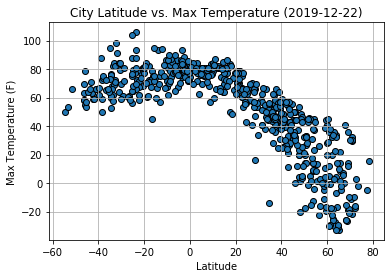

In [9]:
# Plotting using Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')

plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

In [10]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Humidity ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Humidity (%)')

p.circle('Lat', 'Humidity', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

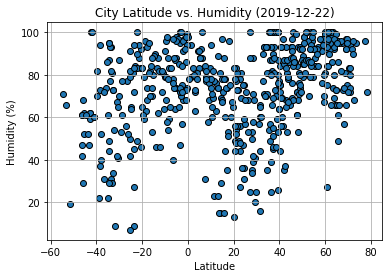

In [11]:
# plotting usign Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')

plt.savefig('City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

In [12]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Cloudiness ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Cloudiness (%)')

p.circle('Lat', 'Cloudiness', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

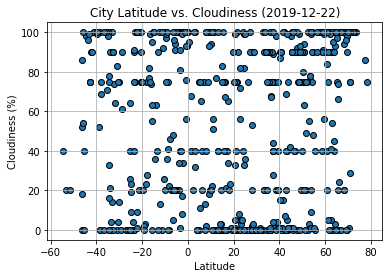

In [13]:
# plotting using Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], ec='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')

plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

In [14]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Wind Speed ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Wind Speed (mph)')

p.circle('Lat', 'Wind Speed', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

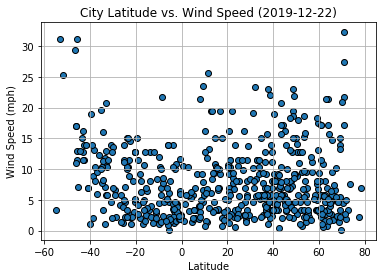

In [15]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')

plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()